In [1]:
#Title:  Hierarchical Clustering


# Agglomerative vs Divisive Clustering

# Task 1: Agglomerative Clustering on Simple Numerical Data

# 1. Load the following dataset: [1, 2, 5, 10, 15, 30] .
# 2. Apply Agglomerative Clustering where each point starts as its own cluster and successively merge the closest pair of clusters.
# 3. Observe and note down the order in which points are merged.


# Task 2: Divisive Clustering on Simple Numerical Data

# 1. Use the same dataset: [1, 2, 5, 10, 15, 30] .
# 2. Start with all points in a single cluster and successively divide until each point is its own cluster.
# 3. Record the divisions made at each step.

# Task 3: Comparing Agglomerative and Divisive Methods on a 2D Dataset

# 1. Create a small 2D dataset: [(1, 2), (2, 3), (10, 10), (25, 25), (26, 27)] .
# 2. Apply both Agglomerative and Divisive Clustering on this dataset.
# 3. Compare the results and discuss the similarities and differences.




Agglomerative Clustering linkage matrix:
 [[ 0.  1.  1.  2.]
 [ 2.  6.  3.  3.]
 [ 3.  7.  5.  4.]
 [ 4.  8.  5.  5.]
 [ 5.  9. 15.  6.]]

Order of merges (clusters combined):
Step 1: Merge clusters 0 and 1 at distance 1.00
Step 2: Merge clusters 2 and 6 at distance 3.00
Step 3: Merge clusters 3 and 7 at distance 5.00
Step 4: Merge clusters 4 and 8 at distance 5.00
Step 5: Merge clusters 5 and 9 at distance 15.00


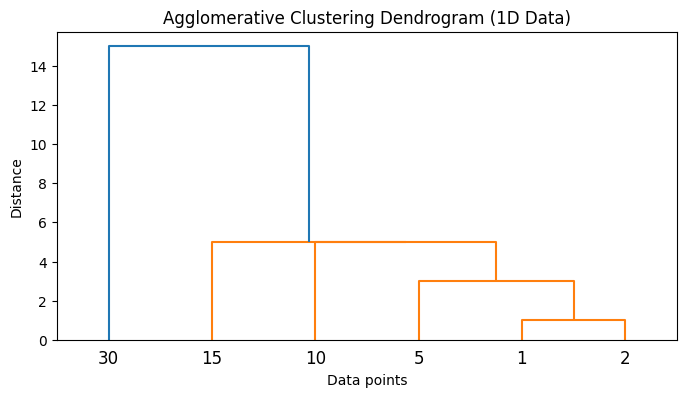


Divisive Clustering steps:
Splitting cluster of size 6 into:
 - Subcluster 0 with points: [ 1  2  5 10 15]
  Splitting cluster of size 5 into:
   - Subcluster 0 with points: [1 2 5]
    Splitting cluster of size 3 into:
     - Subcluster 0 with points: [1 2]
      Splitting cluster of size 2 into:
       - Subcluster 0 with points: [2]
        Cluster with single point: [2]
       - Subcluster 1 with points: [1]
        Cluster with single point: [1]
     - Subcluster 1 with points: [5]
      Cluster with single point: [5]
   - Subcluster 1 with points: [10 15]
    Splitting cluster of size 2 into:
     - Subcluster 0 with points: [15]
      Cluster with single point: [15]
     - Subcluster 1 with points: [10]
      Cluster with single point: [10]
 - Subcluster 1 with points: [30]
  Cluster with single point: [30]


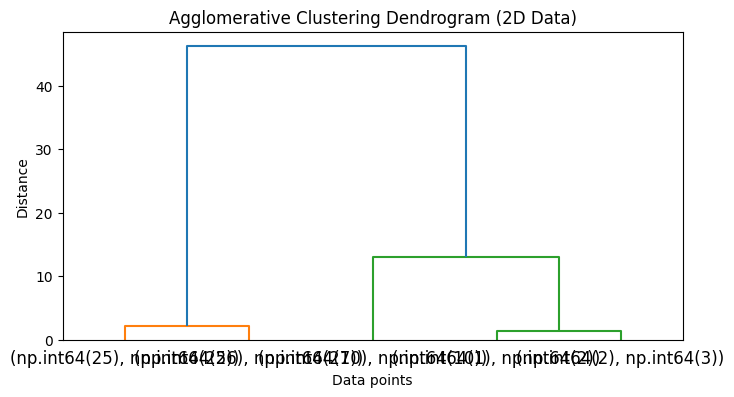

Agglomerative clustering linkage matrix (2D):
[[ 0.          1.          1.41421356  2.        ]
 [ 3.          4.          2.23606798  2.        ]
 [ 2.          5.         13.08943594  3.        ]
 [ 6.          7.         46.19162983  5.        ]]

Divisive Clustering steps on 2D data:
Splitting cluster of size 5 into:
 - Subcluster 0 with points: [ 1  2  2  3 10 10]
  Splitting cluster of size 3 into:
   - Subcluster 0 with points: [1 2 2 3]
    Splitting cluster of size 2 into:
     - Subcluster 0 with points: [2 3]
      Cluster with single point: [2 3]
     - Subcluster 1 with points: [1 2]
      Cluster with single point: [1 2]
   - Subcluster 1 with points: [10 10]
    Cluster with single point: [10 10]
 - Subcluster 1 with points: [25 25 26 27]
  Splitting cluster of size 2 into:
   - Subcluster 0 with points: [26 27]
    Cluster with single point: [26 27]
   - Subcluster 1 with points: [25 25]
    Cluster with single point: [25 25]

Discussion:
- Agglomerative clustering sta

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# ---------
# Task 1: Agglomerative Clustering on [1, 2, 5, 10, 15, 30]
# ---------

data_1d = np.array([1, 2, 5, 10, 15, 30]).reshape(-1, 1)

# Perform Agglomerative clustering using 'single' linkage for example
Z_agglo = linkage(data_1d, method='single')

print("Agglomerative Clustering linkage matrix:\n", Z_agglo)

# Each row in Z_agglo: [idx1, idx2, distance, sample_count]
# The order of merges is from top to bottom

print("\nOrder of merges (clusters combined):")
for i, row in enumerate(Z_agglo):
    print(f"Step {i+1}: Merge clusters {int(row[0])} and {int(row[1])} at distance {row[2]:.2f}")

# Optional: Plot dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z_agglo, labels=data_1d.flatten())
plt.title('Agglomerative Clustering Dendrogram (1D Data)')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()


# ---------
# Task 2: Divisive Clustering on the same data
# ---------

# Divisive clustering is not directly implemented in scipy,
# but we can simulate it via recursive splits using k-means or by manually cutting dendrogram.

# For simplicity, let's do divisive clustering via recursive splitting with k=2 at each step

from sklearn.cluster import KMeans

def divisive_clustering(data, depth=0):
    n = len(data)
    indent = "  " * depth
    if n <= 1:
        print(f"{indent}Cluster with single point: {data.flatten()}")
        return
    # Split into 2 clusters
    kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
    labels = kmeans.labels_
    print(f"{indent}Splitting cluster of size {n} into:")
    for cluster_id in np.unique(labels):
        cluster_points = data[labels == cluster_id]
        print(f"{indent} - Subcluster {cluster_id} with points: {cluster_points.flatten()}")
        # Recursive split
        divisive_clustering(cluster_points, depth+1)

print("\nDivisive Clustering steps:")
divisive_clustering(data_1d)


# ---------
# Task 3: Compare Agglomerative vs Divisive on 2D Dataset
# ---------

data_2d = np.array([(1, 2), (2, 3), (10, 10), (25, 25), (26, 27)])

# Agglomerative Clustering (using Ward linkage)
Z_agglo_2d = linkage(data_2d, method='ward')

plt.figure(figsize=(8, 4))
dendrogram(Z_agglo_2d, labels=[str(tuple(p)) for p in data_2d])
plt.title('Agglomerative Clustering Dendrogram (2D Data)')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

print("Agglomerative clustering linkage matrix (2D):")
print(Z_agglo_2d)

print("\nDivisive Clustering steps on 2D data:")
divisive_clustering(data_2d)

# Discussion:
print("""
Discussion:
- Agglomerative clustering starts with each point as its own cluster and merges closest pairs step-by-step.
- Divisive clustering starts with all points in one cluster and splits recursively.
- Agglomerative tends to be bottom-up, divisive is top-down.
- Results can differ in cluster boundaries, especially when clusters are not well-separated.
- Agglomerative with Ward linkage minimizes variance within clusters, while divisive splits depend on chosen splitting method.
""")
